# CAR PRICE PREDICTION

Problem Statement
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

1. Data Collection Phase
I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model



In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_uc = pd.read_csv("Used_Cars_Data.csv",index_col=0)
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2018 Jeep Compass,12.55 Lakh,1.4 Limited,"78,151 kms",Petrol,Automatic
1,2017 Hyundai i20,6.64 Lakh,Asta 1.4 CRDi,"85,483 kms",Diesel,Manual
2,2016 Honda City,7.37 Lakh,i VTEC V,"25,542 kms",Petrol,Manual
3,2017 Renault Duster,7.50 Lakh,Petrol RXS CVT,"31,525 kms",Petrol,Automatic
4,2019 Hyundai Santro,5.48 Lakh,Sportz AMT BSIV,"20,044 kms",Petrol,Automatic
...,...,...,...,...,...,...
75,2013 BMW 7 Series,20.95 Lakh,730Ld,"85,000 kms",Diesel,Automatic
76,2015 Mini Cooper,24.90 Lakh,S,"20,000 kms",Petrol,Automatic
77,2020 Toyota Innova Crysta,20.75 Lakh,2.4 GX AT,"12,000 kms",Diesel,Automatic
78,2015 Mercedes-Benz C-Class,20.75 Lakh,C 220 CDI Avantgarde,"65,000 kms",Diesel,Automatic


PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [3]:
# Checking shape of my dataset
df_uc.shape

(480, 6)

In [4]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant'], dtype='object')

In [5]:
df_uc.dtypes

Brand         object
Price         object
Model         object
KMS_driven    object
Fuel          object
Variant       object
dtype: object

In [6]:
df_uc['Price']

0     12.55 Lakh
1      6.64 Lakh
2      7.37 Lakh
3      7.50 Lakh
4      5.48 Lakh
         ...    
75    20.95 Lakh
76    24.90 Lakh
77    20.75 Lakh
78    20.75 Lakh
79    18.99 Lakh
Name: Price, Length: 480, dtype: object

In [7]:
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 79
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       480 non-null    object
 1   Price       480 non-null    object
 2   Model       480 non-null    object
 3   KMS_driven  480 non-null    object
 4   Fuel        480 non-null    object
 5   Variant     480 non-null    object
dtypes: object(6)
memory usage: 26.2+ KB


In [8]:
# Value counts of each column.
for i in df_uc.columns:
        print(df_uc[i].value_counts())
        print('-------------------------------------------------')

2018 Maruti Baleno                 16
2018 Hyundai i20                   12
2020 Hyundai Santro                12
2019 MG Hector                     12
2019 Honda WR-V                    12
                                   ..
2018 Mahindra Bolero Power Plus     4
2020 MG Hector Plus                 4
2017 Toyota Corolla Altis           4
2015 Mercedes-Benz C-Class          4
2017 Hyundai Creta                  4
Name: Brand, Length: 92, dtype: int64
-------------------------------------------------
5.48 Lakh     12
5.90 Lakh      8
3.26 Lakh      8
5.96 Lakh      8
8.40 Lakh      8
              ..
7.25 Lakh      4
18.93 Lakh     4
20.80 Lakh     4
92.00 Lakh     4
46.50 Lakh     4
Name: Price, Length: 99, dtype: int64
-------------------------------------------------
Sharp DCT           16
1.2 Alpha           16
1.2 Spotz           16
i-VTEC VX           12
VXI                 12
                    ..
W8 FWD               4
2.4 ZX 7 STR         4
XZ Turbo             4
1.6 SX Dual 

EXTRACTION

In [9]:
# Extracting 'Price' values from Price
df_uc['Price'] = df_uc['Price'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2018 Jeep Compass,12.55,1.4 Limited,"78,151 kms",Petrol,Automatic
1,2017 Hyundai i20,6.64,Asta 1.4 CRDi,"85,483 kms",Diesel,Manual
2,2016 Honda City,7.37,i VTEC V,"25,542 kms",Petrol,Manual
3,2017 Renault Duster,7.50,Petrol RXS CVT,"31,525 kms",Petrol,Automatic
4,2019 Hyundai Santro,5.48,Sportz AMT BSIV,"20,044 kms",Petrol,Automatic
...,...,...,...,...,...,...
75,2013 BMW 7 Series,20.95,730Ld,"85,000 kms",Diesel,Automatic
76,2015 Mini Cooper,24.90,S,"20,000 kms",Petrol,Automatic
77,2020 Toyota Innova Crysta,20.75,2.4 GX AT,"12,000 kms",Diesel,Automatic
78,2015 Mercedes-Benz C-Class,20.75,C 220 CDI Avantgarde,"65,000 kms",Diesel,Automatic


In [10]:
# Extracting 'KMS_driven' from KMS_driven
df_uc['KMS_driven'] = df_uc['KMS_driven'].str.split().str[0]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant
0,2018 Jeep Compass,12.55,1.4 Limited,"78,151",Petrol,Automatic
1,2017 Hyundai i20,6.64,Asta 1.4 CRDi,"85,483",Diesel,Manual
2,2016 Honda City,7.37,i VTEC V,"25,542",Petrol,Manual
3,2017 Renault Duster,7.50,Petrol RXS CVT,"31,525",Petrol,Automatic
4,2019 Hyundai Santro,5.48,Sportz AMT BSIV,"20,044",Petrol,Automatic
...,...,...,...,...,...,...
75,2013 BMW 7 Series,20.95,730Ld,"85,000",Diesel,Automatic
76,2015 Mini Cooper,24.90,S,"20,000",Petrol,Automatic
77,2020 Toyota Innova Crysta,20.75,2.4 GX AT,"12,000",Diesel,Automatic
78,2015 Mercedes-Benz C-Class,20.75,C 220 CDI Avantgarde,"65,000",Diesel,Automatic


In [11]:
# Extracting Manufacturing Year from Brand
df_uc['Manuf_Year'] = df_uc['Brand'].str.split().str[0]
df_uc['Brand'] = df_uc['Brand'].str.split().str[1]
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,Jeep,12.55,1.4 Limited,"78,151",Petrol,Automatic,2018
1,Hyundai,6.64,Asta 1.4 CRDi,"85,483",Diesel,Manual,2017
2,Honda,7.37,i VTEC V,"25,542",Petrol,Manual,2016
3,Renault,7.50,Petrol RXS CVT,"31,525",Petrol,Automatic,2017
4,Hyundai,5.48,Sportz AMT BSIV,"20,044",Petrol,Automatic,2019
...,...,...,...,...,...,...,...
75,BMW,20.95,730Ld,"85,000",Diesel,Automatic,2013
76,Mini,24.90,S,"20,000",Petrol,Automatic,2015
77,Toyota,20.75,2.4 GX AT,"12,000",Diesel,Automatic,2020
78,Mercedes-Benz,20.75,C 220 CDI Avantgarde,"65,000",Diesel,Automatic,2015


In [12]:
# Converting object data type columns to float data type
df_uc = df_uc.astype({'Price':'float', 'Manuf_Year':'int'})

In [13]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

In [14]:
df_uc.isnull().sum()

Brand         0
Price         0
Model         0
KMS_driven    0
Fuel          0
Variant       0
Manuf_Year    0
dtype: int64

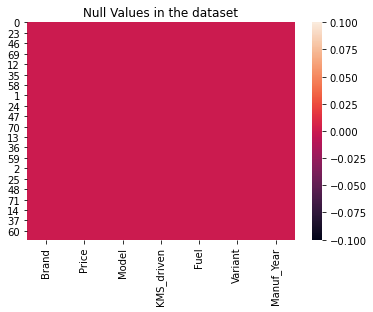

In [15]:
# Visualizing null values in the dataset
sns.heatmap(df_uc.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [16]:
df_uc.describe()

,Price,Manuf_Year
count,480.000000,480.000000
mean,12.737917,2017.750000
std,13.316515,2.287298
min,3.050000,2012.000000
25%,5.895000,2016.000000
50%,7.450000,2018.000000
75%,14.102500,2020.000000
max,92.000000,2022.000000


In [17]:
#Checking for empty observations in target column
df_uc.loc[df_uc['Price'] == " "]

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year


No empty observations

DATA VISUALIZATION

Univariate analysis

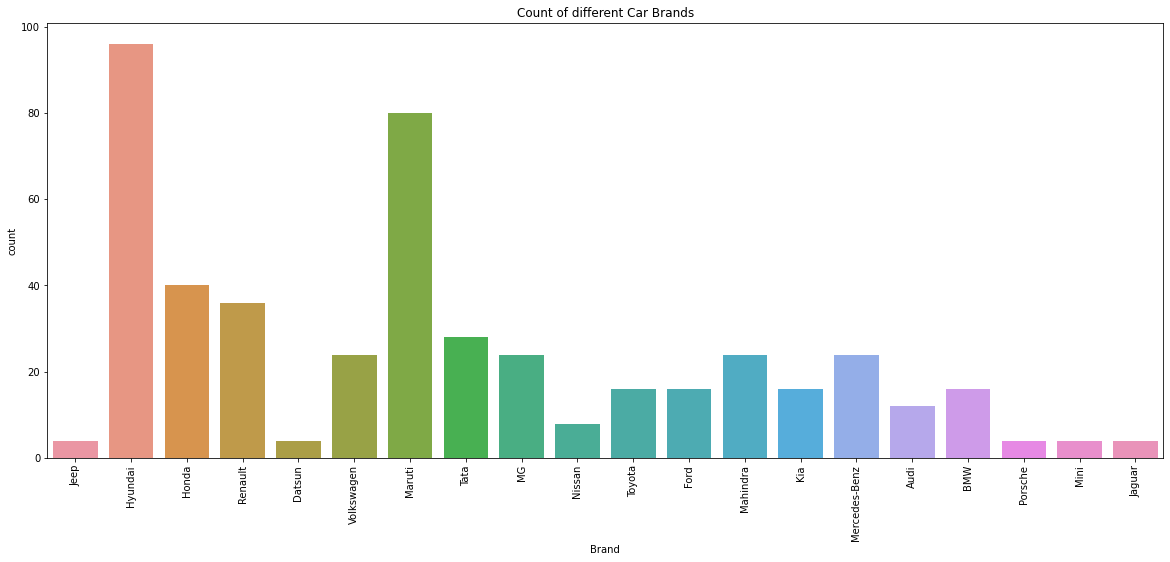

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(df_uc["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

Hyundai,Maruti,Honda,Renault,Tata,Toyoto are most used cars

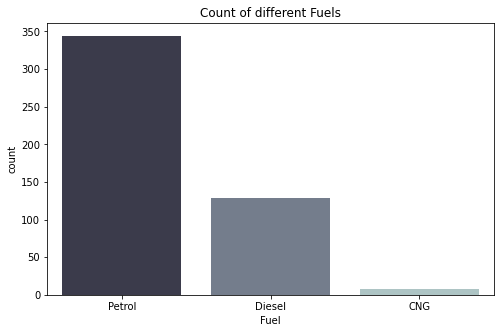

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(df_uc["Fuel"],palette='bone')
plt.title("Count of different Fuels")
plt.show()

The major type of fuel is petrol followed by diesel

Manual       312
Automatic    168
Name: Variant, dtype: int64


<AxesSubplot:ylabel='Variant'>

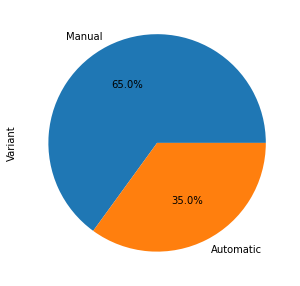

In [20]:
plt.figure(figsize=(10,5))
print(df_uc['Variant'].value_counts())
df_uc['Variant'].value_counts().plot.pie(autopct='%1.1f%%')

65% are manual nd 35% are automatic

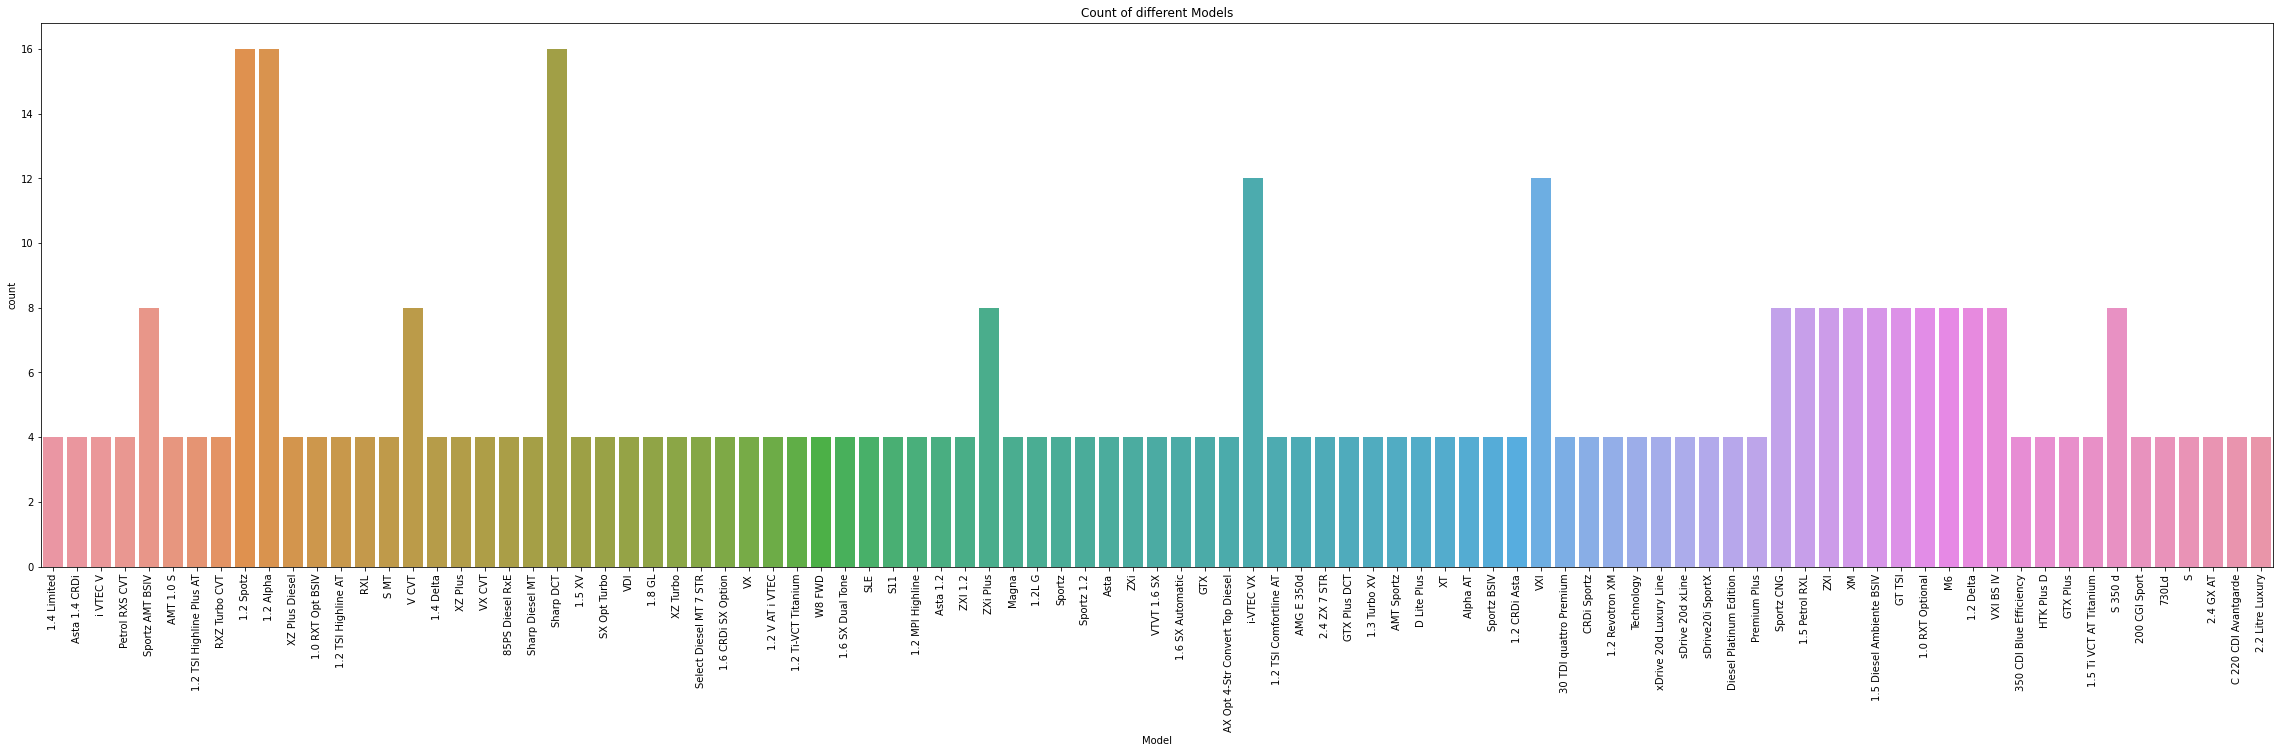

In [21]:
plt.figure(figsize=[40,10])
sns.countplot(df_uc['Model'])
plt.title("Count of different Models")
plt.xticks(rotation=90)
plt.show()

 The count of VXI, LXI, VXI BS IV, 1.2 Delta & 1.2 Alpha are highest among all the models.

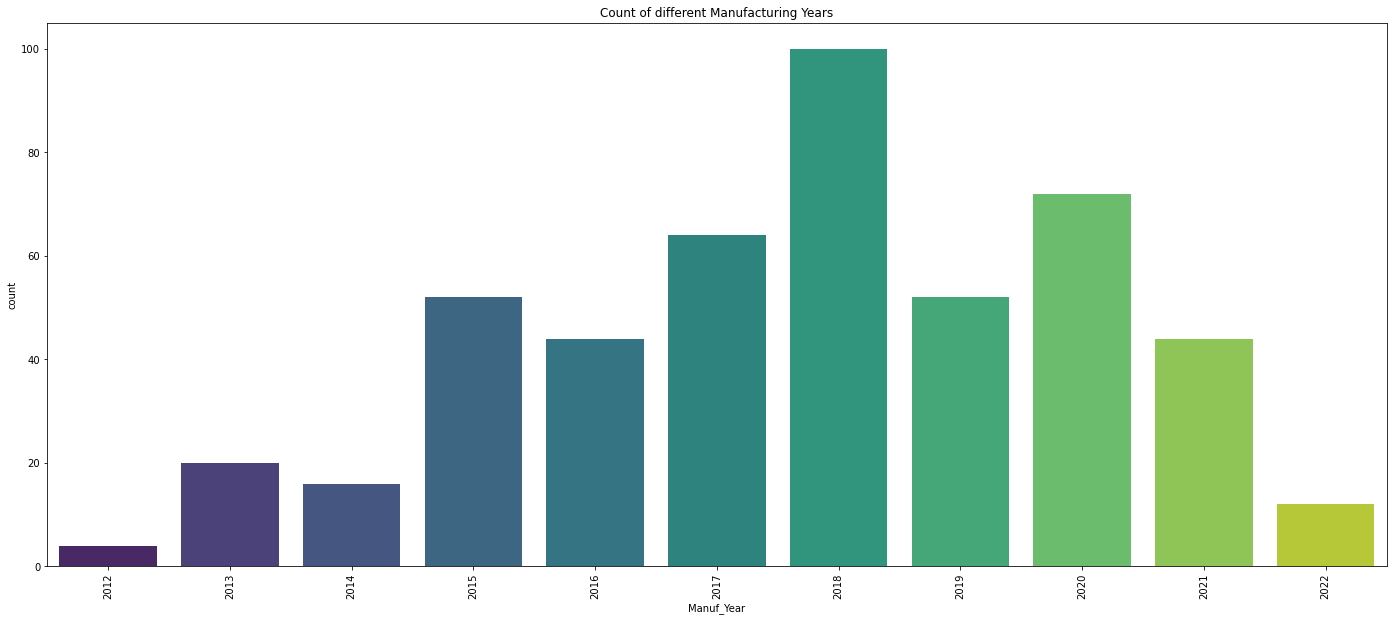

In [22]:
plt.figure(figsize=[24,10])
sns.countplot(df_uc['Manuf_Year'],palette='viridis')
plt.title("Count of different Manufacturing Years")
plt.xticks(rotation=90)
plt.show()


Most of the used cars are manufactured in 2018,2020,2019,2017,2015,2021

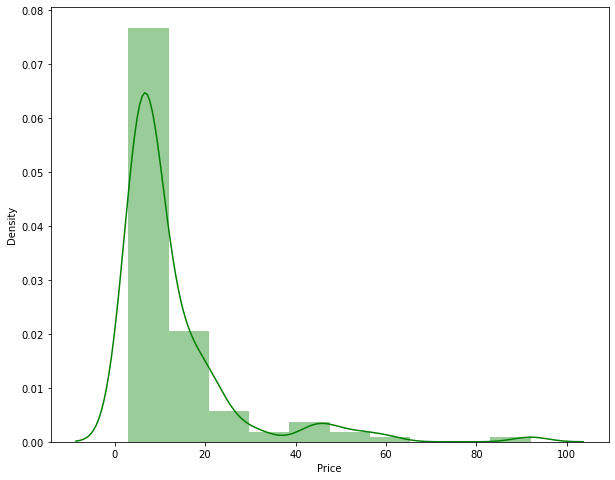

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(df_uc["Price"],bins=10,color='green')
plt.show()

The distribution is normal but skewed is right

BIVARIATE ANALYSIS

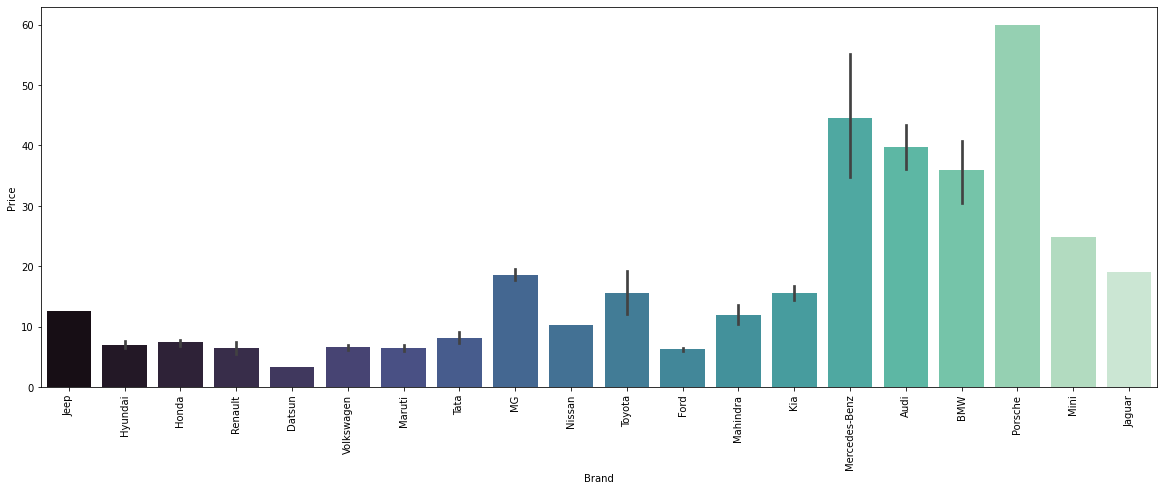

In [24]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=df_uc,palette='mako')
plt.xticks(rotation=90)
plt.show();

PRICE VS BAND: Most of the used cars are of the Maruti Brand. The Prices of Maruti, Mercedes Benz & Audi are hig

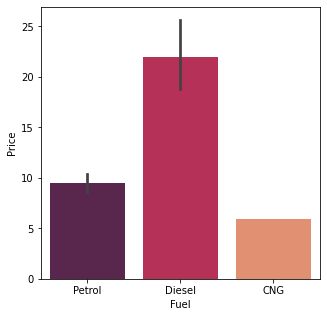

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=df_uc,palette='rocket')
plt.show();

PRICEVSFUEL:Most of the used car are diesel followed by petrol

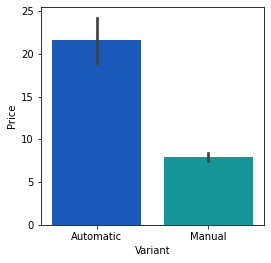

In [26]:
plt.figure(figsize=(4,4))
sns.barplot(x='Variant',y='Price',data=df_uc,palette='winter')
plt.show();

Most of the used cars are automatic followed by manual

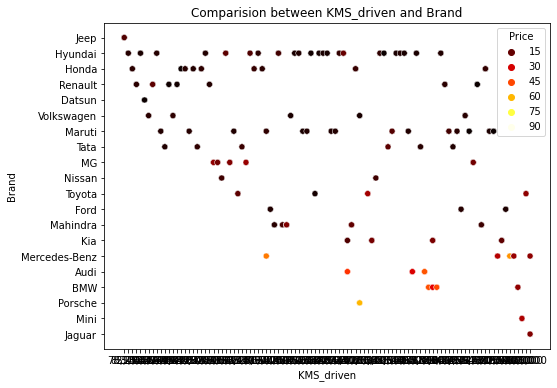

In [27]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Brand'],hue=df_uc['Price'],palette="hot");

The above visualization shows the relationship between KMS_driven and Brand in terms of Price. The majority of the cars have kms driven in between 100 & 500. There are a few outliers present in Brand. There is no positive or negative correlation between either Brand or KMS_driven towards price.

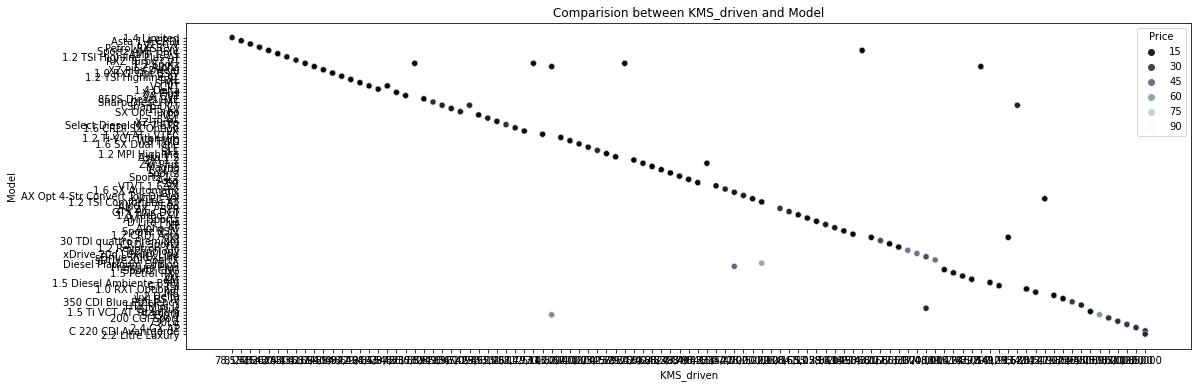

In [28]:
plt.figure(figsize=[18,6])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Model'],hue=df_uc['Price'],palette="bone");

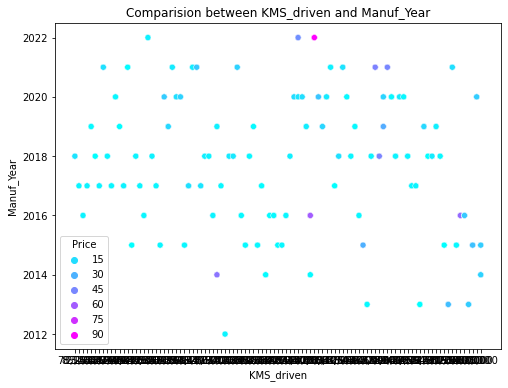

In [29]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(df_uc['KMS_driven'],df_uc['Manuf_Year'],hue=df_uc['Price'],palette="cool");

The above visualization shows the relationship between KMS_driven and Manuf_Year in terms of Price. Most of the car's manufacturing years are between 2015 & 2020. There are outliers present in the Manuf_Year column. Manuf_Year is positively correlated with our target Price.



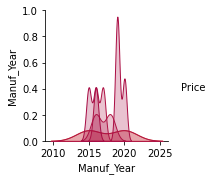

In [30]:
sns.pairplot(df_uc,hue="Price",palette="Spectral")
plt.show()

Encoding

In [31]:
df_uc.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant',
       'Manuf_Year'],
      dtype='object')

In [32]:
df_uc.dtypes

Brand          object
Price         float64
Model          object
KMS_driven     object
Fuel           object
Variant        object
Manuf_Year      int32
dtype: object

Label encoder is used to encode the dataframe

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df_uc['Brand'] = le.fit_transform(df_uc['Brand'])
df_uc['Model'] = le.fit_transform(df_uc['Model'])
df_uc['KMS_driven'] = le.fit_transform(df_uc['KMS_driven'])
df_uc['Fuel'] = le.fit_transform(df_uc['Fuel'])
df_uc['Variant'] = le.fit_transform(df_uc['Variant'])

In [35]:
df_uc

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,7,12.55,16,92,2,0,2018
1,5,6.64,40,98,1,1,2017
2,4,7.37,88,27,2,1,2016
3,16,7.50,52,41,2,0,2017
4,5,5.48,67,20,2,0,2019
...,...,...,...,...,...,...,...
75,1,20.95,31,97,1,0,2013
76,13,24.90,56,19,2,0,2015
77,18,20.75,26,4,1,0,2020
78,12,20.75,41,84,1,0,2015


OUTLIERS

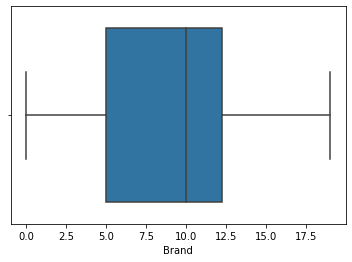

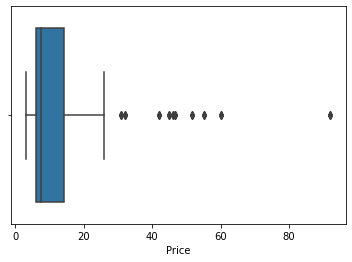

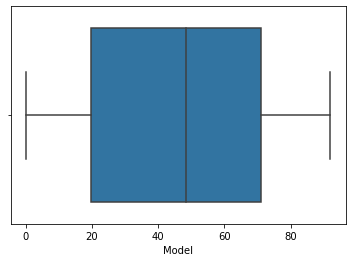

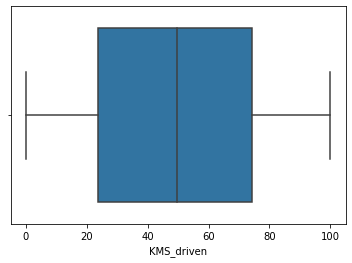

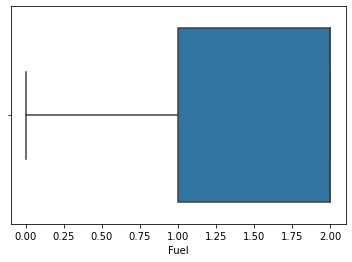

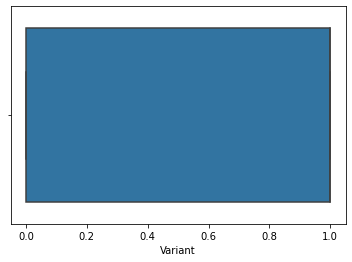

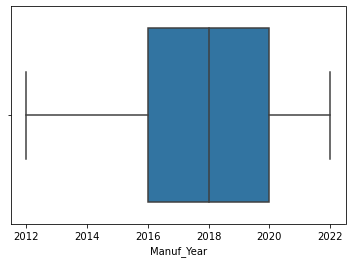

In [36]:
for i in df_uc.columns:
    sns.boxplot(df_uc[i])
    plt.show()

We can see outliers present in the columns : "Brand", "Price", "Variant" & "Manuf_Year". Since Price is our target variable we shall not remove outliers from this column.



REMOVING OUTLIERS

We shall remove the outliers present in the dataset using Z-Score Method.



In [37]:
df_outliers=df_uc[["Brand", "Variant", "Manuf_Year"]]


In [38]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=df_uc[(z<3).all(axis=1)]
df_usedcars

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,7,12.55,16,92,2,0,2018
1,5,6.64,40,98,1,1,2017
2,4,7.37,88,27,2,1,2016
3,16,7.50,52,41,2,0,2017
4,5,5.48,67,20,2,0,2019
...,...,...,...,...,...,...,...
75,1,20.95,31,97,1,0,2013
76,13,24.90,56,19,2,0,2015
77,18,20.75,26,4,1,0,2020
78,12,20.75,41,84,1,0,2015


In [39]:
df_usedcars.shape

(480, 7)

In [40]:
df_uc.shape

(480, 7)

In [41]:
Data_loss=((480-480)/480)*100
Data_loss

0.0

dataloss is 0%

SKEWNESS

In [42]:
df_usedcars.skew()

Brand         0.202585
Price         3.085000
Model        -0.096462
KMS_driven    0.027020
Fuel         -1.287001
Variant      -0.630944
Manuf_Year   -0.304305
dtype: float64

In [43]:
df_skew=['Fuel','Variant']

In [44]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [45]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)


In [46]:
df_usedcars[df_skew].skew()


Fuel      -0.966453
Variant   -0.630944
dtype: float64

CORRELATION

In [47]:
df_usedcars.corr()

,Brand,Price,Model,KMS_driven,Fuel,Variant,Manuf_Year
Brand,1.000000,-0.090190,-0.188326,-0.107560,0.066031,0.111703,0.007910
Price,-0.090190,1.000000,0.110832,-0.085949,-0.387914,-0.489927,0.179462
Model,-0.188326,0.110832,1.000000,-0.083134,-0.042414,-0.013276,0.110915
KMS_driven,-0.107560,-0.085949,-0.083134,1.000000,-0.104608,-0.050627,-0.370629
Fuel,0.066031,-0.387914,-0.042414,-0.104608,1.000000,0.001648,0.097695
Variant,0.111703,-0.489927,-0.013276,-0.050627,0.001648,1.000000,0.003823
Manuf_Year,0.007910,0.179462,0.110915,-0.370629,0.097695,0.003823,1.000000


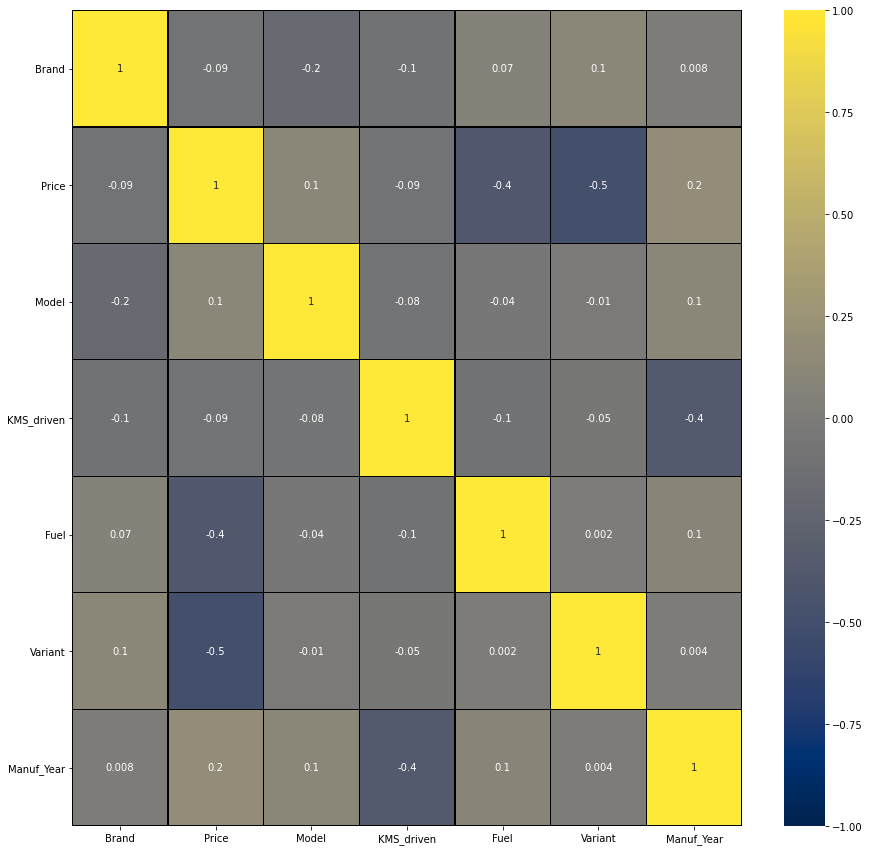

In [48]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="cividis")
plt.yticks(rotation=0);

From the above correlation map, we see that the columns, Variant & Fuel are highly neagtively correlated with our target Price. The column Manuf_Year is highly positively correlated with our target.

We can clearly observe a multicolinearity issue in some of the features of test dataset so we have to check VIF.

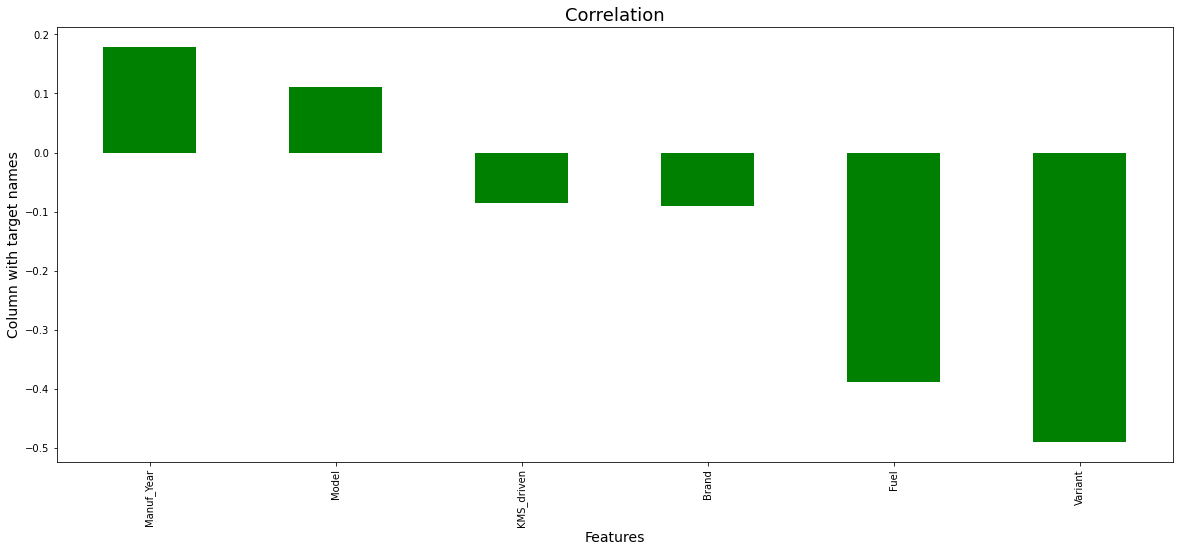

In [49]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Regression model buildng

In [50]:
x = df_usedcars.drop("Price",axis=1)
y = df_usedcars["Price"]

In [51]:
x.shape

(480, 6)

In [52]:
y.shape

(480,)

SCALING

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Brand,Model,KMS_driven,Fuel,Variant,Manuf_Year
0,-0.462065,-1.069095,1.431972,0.628607,-1.362770,0.109413
1,-0.839262,-0.220887,1.634610,-1.579379,0.733799,-0.328240
2,-1.027860,1.475528,-0.763268,0.628607,0.733799,-0.765893
3,1.235318,0.203216,-0.290447,0.628607,-1.362770,-0.328240
4,-0.839262,0.733346,-0.999679,0.628607,-1.362770,0.547066
...,...,...,...,...,...,...
475,-1.593654,-0.538965,1.600837,-1.579379,-1.362770,-2.078853
476,0.669523,0.344584,-1.033452,0.628607,-1.362770,-1.203546
477,1.612514,-0.715675,-1.540046,-1.579379,-1.362770,0.984720
478,0.480925,-0.185545,1.161789,-1.579379,-1.362770,-1.203546


VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.068116,Brand
1,1.057872,Model
2,1.187560,KMS_driven
3,1.020930,Fuel
4,1.014442,Variant
5,1.174206,Manuf_Year


VIF values are below 10 so there is no Multicollinearity in the columns

# Best Random State

In [55]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [56]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.9103939432013195  on Random State : 31


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [58]:
x_train.shape

(336, 6)

In [59]:
x_test.shape

(144, 6)

In [60]:
y_train.shape

(336,)

In [61]:
y_test.shape

(144,)

# LINEAR REGRESSION

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.07891993511946693
Mean absolute error:  6.495126956972284
Mean squared error:  66.441357625132
Root Mean squared error:  8.151156827416093


DECISION TREE REGRESSOR

In [64]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.9704495161375709
Mean absolute error:  0.24333333333333348
Mean squared error:  2.1316000000000006
Root Mean squared error:  1.4600000000000002


KNN REGRESSOR

In [65]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.9103939432013195
Mean absolute error:  1.4763611111111112
Mean squared error:  6.4636596666666675
Root Mean squared error:  2.542372841789077


SVR

In [66]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.405065176632468
Mean absolute error:  3.458985604446948
Mean squared error:  42.91513720702866
Root Mean squared error:  6.550964601265119


RANDOM FOREST REGRESSOR

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))


R2_Score:  0.9742002542503182
Mean absolute error:  0.48270138888888897
Mean squared error:  1.8610435719444465
Root Mean squared error:  1.3642007080867706


GRADIENT BOOST REGRESSOR

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.96009686924029
Mean absolute error:  1.2046961605591575
Mean squared error:  2.8783797220843854
Root Mean squared error:  1.6965788287269135


EXTRA TREES REGRESSOR

In [69]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.9917357016023273
Mean absolute error:  0.12868333333334359
Mean squared error:  0.5961384099999991
Root Mean squared error:  0.7720999999999995


XGBOOST REGRESSOR

In [70]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  0.9901404026595066
Mean absolute error:  0.1413968782292471
Mean squared error:  0.7112139953050479
Root Mean squared error:  0.8433350433280049


CROSS VALIDATION REGRESSOR

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  -1.2199829147904637


In [73]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  -1.248592121823618


In [74]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  -0.024032862483358654


In [75]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  -0.07851445933150607


In [76]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  -0.889667637661538


In [77]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  -0.23984012477965905


In [78]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  0.19095379111117286


In [79]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.44685732346020857


The highest cross validation score belonmgs to Extra Trees Regressor, followed by Gradient Boosting Regressor & Random Forest Regressor.

The cross validation scores of KNearest Neighbors Regressor, Decision Tree Regressor & Linear Regression Model are negative and are the lowest of all scores

# HYPER METER TUNING

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_xgb = GridSearchCV(xgb, param_grid = parameters, cv = 5)

In [82]:
grid_xgb.fit(x_train, y_train)

[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

[14:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "ma

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
          

In [83]:
grid_xgb.best_params_

{'criterion': 'squared_error',
 'max_features': 'auto',
 'n_estimators': 1000,
 'n_jobs': -2}

In [85]:
Best_model = XGBRegressor(criterion='mse',max_features='log2',n_jobs=1,n_estimators=10)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

[14:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R2_Score:  0.9813331553997078
Mean absolute error:  0.6514661071697871
Mean squared error:  1.3465175776892342
Root Mean squared error:  1.1603954402225278


after hyperparameter tuning we got 98% score

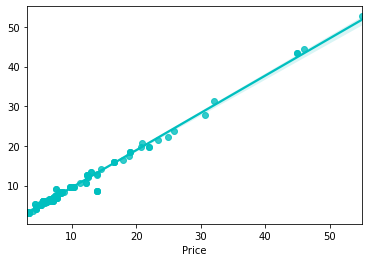

In [86]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="c")
plt.show()

# SAVING THE MODEL

In [87]:
import joblib
joblib.dump(Best_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

In [88]:
# Loading the saved model
used_car_model=joblib.load("Used_Car_Price_Prediction.pkl")

# Prediction
prediction = used_car_model.predict(x_test)
prediction

array([ 5.511715 ,  9.270852 ,  6.89433  ,  6.2018204,  8.397506 ,
        8.397506 , 23.830406 ,  6.0711884,  8.722645 , 18.557884 ,
        6.5441194,  4.186677 , 18.37209  , 18.37209  ,  6.1693716,
        5.833731 , 15.971926 ,  5.8148313, 12.665984 ,  6.9291916,
        3.1694355,  5.1558094,  6.5437546,  7.270191 ,  4.6232724,
        6.0588045,  4.4293804,  6.0588045,  4.566188 , 13.02016  ,
        3.1221173,  5.2888575,  9.578729 ,  6.2069893,  8.110796 ,
        6.91226  ,  5.6012197,  8.722645 ,  3.2313714, 12.742612 ,
        9.578729 ,  6.91226  ,  6.9291916,  5.945275 , 12.168752 ,
       10.712223 , 31.362528 ,  8.110796 , 15.971926 ,  8.397506 ,
        3.1694355,  6.0237937,  6.0695906,  7.270191 , 19.6308   ,
        3.3225155, 12.665984 , 12.168752 , 12.665984 ,  6.91226  ,
        8.110796 ,  6.48556  ,  6.261918 , 43.534565 ,  9.7724495,
        9.578729 ,  6.736262 ,  6.9291916,  6.48556  , 21.437468 ,
        7.270191 ,  6.223175 , 19.86478  ,  5.1981244,  4.1866

In [89]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
Predicted,5.511715,9.270852,6.89433,6.20182,8.397506,8.397506,23.830406,6.071188,8.722645,18.557884,...,9.772655,5.857474,8.335029,9.772655,6.076975,6.023794,6.20182,3.63255,6.929192,3.322515
Actual,5.210000,7.500000,7.43000,6.25000,8.850000,8.490000,25.900000,6.410000,13.970000,18.970000,...,10.230000,5.480000,8.100000,10.230000,5.850000,5.540000,6.25000,3.95000,7.030000,3.050000


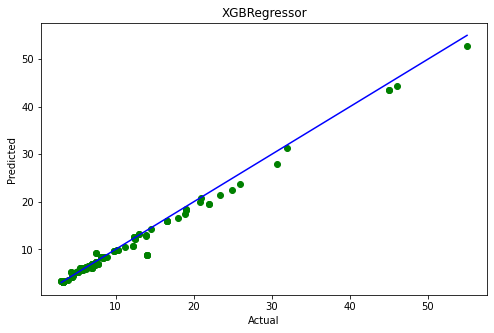

In [90]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, prediction, c='green')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.title("XGBRegressor")
plt.show()